<a href="https://colab.research.google.com/github/bassamadnan/tf-and-neural-network-regression/blob/main/neural_network_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis
Formally (https://en.wikipedia.org/wiki/Regression_analysis),

 `regression analysis is a set of statistical processes for estimating the relationships between a dependent variable  and one or more independent variables.`

Informally, predicting a number


# Anatomy of Neural Networks
Mainly consists of 3 layers, the input layer (this is where the data goes in), the hidden layer (learns the patterns in data), the output layer (outputs learned representation or prediction probabilities)
#Architecture of a Regression Model
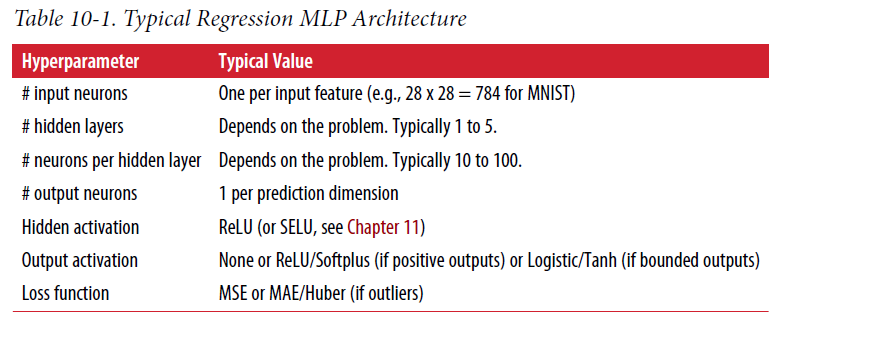


Source- Hands on Machine learning table 10.1


### Creating data to view and fit

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [3]:
y == X + 10 # is the relation here 

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
X.ndim, X[0].ndim

(1, 0)

In [5]:
X.shape, X[0].shape

((8,), ())

In [6]:
tf.constant(X)

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

## Steps in modelling with TensorFlow

1. **Create a model**- define the input,and output layers as well as the hidden layers of a deep learning model. 
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model**- letting the model try and find patterns between features and labels

In [7]:
# Getting data into tensors
X = tf.constant(X)
y = tf.constant(y)

In [8]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using sequential API (" Create a model and sequentially go through the following- "" ) TODO
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # take one number as input and give one number as the output
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent, TODO
              metrics=["mae"])
# 3. Fit the model 
# model.fit(X, y, epochs=5) # Fit the model for 5 laps, look at X and y, and try to figure out the pattern, with 5 oppurtunities to learn them
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 604ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
model.predict([27.0])

1/1 [==============================] - 0s 103ms/step


array([[20.16662]], dtype=float32)

In [11]:
# 27 shouldve corressponded to 17 but gives 20, however the value 17 lies within the mae range

## Improving our model

We can improve our model , by altering the steps we took to create the model in the first place.

1. **Create a new model** - here we might add more layers, increase the number of hidden units (all called neuorons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**- here we might change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting the model**- here we may fit a model for more epochs (look at the training data more time) or on more data  (give the model more examples to learn from).

In [12]:
# # Rebuilding the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])
# model.compile(
#     loss=tf.keras.losses.mae,
#     optimizer=tf.keras.optimizers.SGD(),
#     metrics=["mae"]
# )
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [13]:
# # MAE dropped from ~11 to ~7
# model.predict([17.0]) # Shouldve been 27 but much closer than earlier

In [14]:
# # Trying another improvment
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(100, activation="relu"), #TODO -relu
#     tf.keras.layers.Dense(1)
# ])
# model.compile(loss="mae",
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [15]:
model.predict([17.0]) # The previous model did better apparently (31.2)

1/1 [==============================] - 0s 27ms/step


array([[12.716021]], dtype=float32)

In [16]:
# # What could be the reason? (even though the loss and mae are low)
# # This is due to overfitting
# # Adjusting this a little further
# # Trying another improvment
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(50, activation="relu"), # Change the number of active layers
#     tf.keras.layers.Dense(1)
# ])
# model.compile(loss="mae",
#               optimizer=tf.keras.optimizers.Adam(lr=0.1), # Change the optimizer and the learning rate
#               metrics=["mae"])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [17]:
# model.predict([17.0]) # Closest so far! (28.43)

### Common ways to improve a DL model
- Adding layers
- Increase the number of hidden units
- Change the activation functions
- Change the optimization function
- Change the learning rate (Potentially the most important HP)
- Fitting on more data

# Evaluating a model
This obviously includes having a training set, test set and a validation set, since different metrics and approaches have already been tried on the various projects before, not much of exploration shall be made here.



In [18]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
y = X + 10
X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [19]:
# Split the data
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

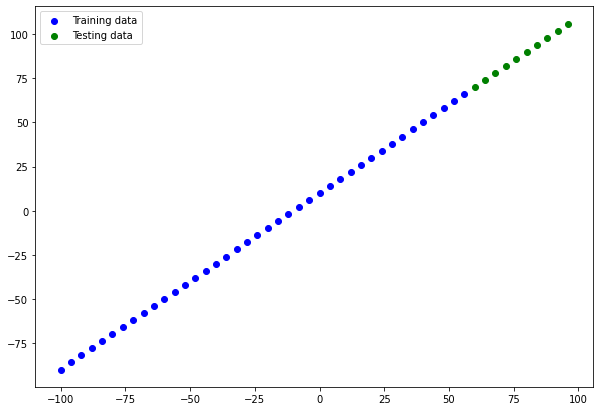

In [20]:
# Visualizing
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [21]:
# y = X+10 plot

In [22]:
# Building the model
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model (The X and y data)
* Trainable params - these are the parameters(patterns) the model can update as it trains

When we import a online model, we might want to freeze non-trainable parameters as we don't want to overwrite the model. (Transfer Learning)

- Resource: MIT Introduction to Deep Learning video on Youtube.

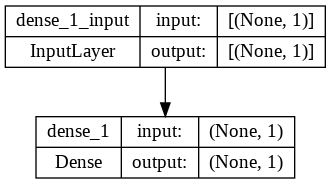

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [24]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 36ms/step


array([[34.203594],
       [36.483833],
       [38.764072],
       [41.04431 ],
       [43.32455 ],
       [45.60479 ],
       [47.885033],
       [50.16527 ],
       [52.44551 ],
       [54.72575 ]], dtype=float32)

In [25]:
# Visualize the predictions 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

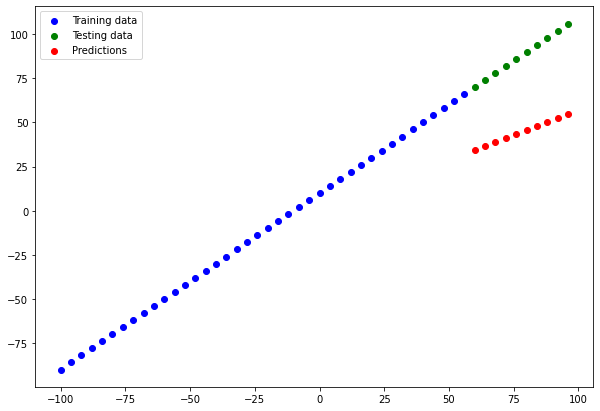

In [26]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [27]:
# Create Evaluation metrics (MAE and MSE, have been covered more in depth in earlier project)
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                       tf.squeeze(y_pred))  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       tf.squeeze(y_pred))

# Running Experiments to improve our model
1. Get more data
2. Make model larger (using a more complex model)- this might come in the form of layers or more hidden units in each layer.
3. Train for longer

Lets do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs 
3. `model_3` - 2 layers, trained for 500 epochs

`Buid model_1`

In [28]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 67ms/step


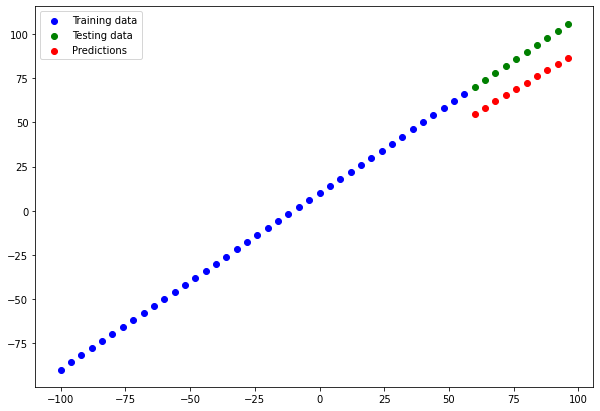

In [29]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [30]:
# Model evaluation 
mae_1 = mae(y_test, (y_preds_1))
mse_1 = mse(y_test, (y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.27238>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.0371>)

` Build model_2` with 2 dense layers trained for 100 epochs

In [31]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse", "mae"]
)
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 74.3969 - mse: 9296.7910 - mae: 74.3969
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 28.1928 - mse: 1154.1486 - mae: 28.1928
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 30.8784 - mse: 1273.6622 - mae: 30.8784
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 23.2699 - mse: 827.0396 - mae: 23.2699
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 23.1364 - mse: 805.8298 - mae: 23.1364
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 19.7520 - mse: 563.6208 - mae: 19.7520
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 21.0035 - mse: 674.8965 - mae: 21.0035
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 15.7871 - mse: 361.1027 - mae: 15.7871
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 30.1793 - mse: 1172.8286 - mae: 30.1793
Epoch 

1/1 [==============================] - 0s 45ms/step


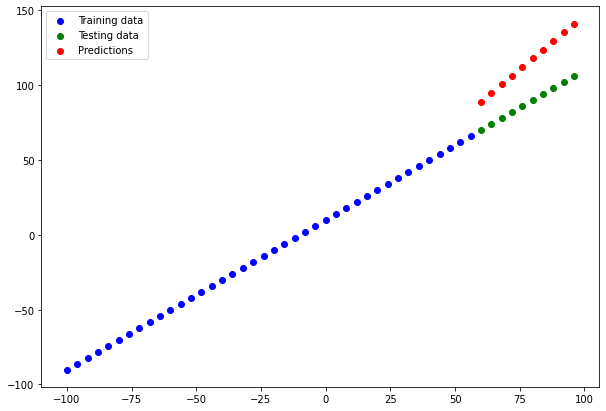

In [32]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [33]:
# Model evaluation 
mae_2 = mae(y_test, (y_preds_2))
mse_2 = mse(y_test, (y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=27.026463>,
 <tf.Tensor: shape=(), dtype=float32, numpy=757.3805>)

`Build model_3` 2 layers, trained for 500 epochs

In [34]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 25.9298 - mae: 25.9298
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 134ms/step


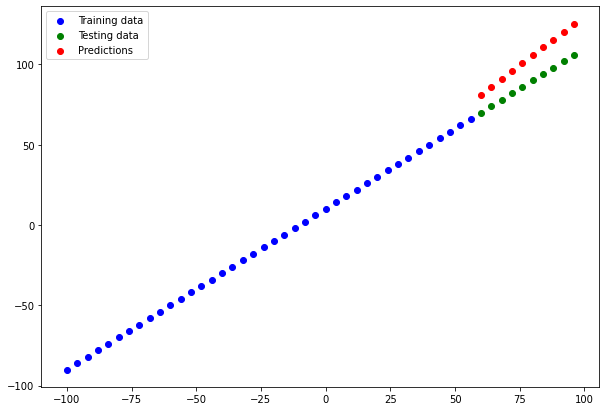

In [35]:
y_preds_3= model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [36]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3 # Better than lats 2 models with mae of 15

(<tf.Tensor: shape=(), dtype=float32, numpy=15.080927>,
 <tf.Tensor: shape=(), dtype=float32, numpy=235.06694>)

In [37]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,17.272381,300.037109
1,model_2,27.026463,757.380493
2,model_3,15.080927,235.066940


# Tracking Experiments
One good habit is to track the results of your experiments, and when doing so some useful resources are 
- TensorBoard - a component of the TensorFlow library to help track modelling experiments 
- Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

# Saving the model
There are two main saving formats
1. The SavedModel format
2. The HDF5 format (already covered in past project)
The save file includes saving
- The model architecture, allowing to re-instantiate the model
- The model weights
- The state of the optimizer, allowing to resume exactly where we left off.

Reffer (https://www.tensorflow.org/guide/keras/save_and_serialize)

In [38]:
model_3.save("best_model_SavedModel_format")

In [39]:
model_3.save("best_model_HDF5_format.h5")

In [40]:
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>